### Course: MADE ML Advanced
### Group: DS-22
### Student: Shchegolev Oleg
### HW3 "Dancing men"

In [1]:
import numpy as np
import re

### Read text corpus for learning

In [2]:
def get_text_corpus(filename, pattern):
    with open(filename, 'r') as fin:
        text = ' '.join(fin.readlines())
    text = ' '.join([w.lower() for w in re.findall(pattern, text, flags=re.IGNORECASE)])
    return text
    
text = get_text_corpus('texts/WarAndPeaceEng.txt', '[a-z]+')
alphabet = np.unique(np.array(list(text)))
print(text[100003:100503])

 chimed in the count who always solved questions that seemed to him perplexing by deciding that everything was splendid just fancy wants to be an hussar what s one to do my dear what a charming creature your younger girl is said the visitor a little volcano yes a regular volcano said the count takes after me and what a voice she has though she s my daughter i tell the truth when i say she ll be a singer a second salomoni we have engaged an italian to give her lessons isn t she too young i have h


### Make encrypted test text

In [3]:
def gen_randomly_decoded_text(original, verbose=False):
    original_chars = np.unique(np.array(list(original)))
    uni_chars = [chr(i) for i in np.random.randint(0, 10000, len(original_chars))]
    mapping = dict(zip(original_chars, uni_chars))
    result = ''.join([mapping[c] for c in original])
    if verbose:
        print('original test text:\n\n', original)
        print('\nmapping:\n\n', mapping)
        print('\nencrypted test text:\n\n', result)
    return mapping, result

size = 500
start = 100000
test1 = text[start:start + size]
mapping, encrypted1 = gen_randomly_decoded_text(test1, True)

original test text:

 ers chimed in the count who always solved questions that seemed to him perplexing by deciding that everything was splendid just fancy wants to be an hussar what s one to do my dear what a charming creature your younger girl is said the visitor a little volcano yes a regular volcano said the count takes after me and what a voice she has though she s my daughter i tell the truth when i say she ll be a singer a second salomoni we have engaged an italian to give her lessons isn t she too young i hav

mapping:

 {' ': 'Ѡ', 'a': 'Ћ', 'b': 'ᚿ', 'c': 'ཙ', 'd': 'Ɲ', 'e': '┄', 'f': 'ލ', 'g': 'ᵑ', 'h': 'ồ', 'i': 'Ų', 'j': '\u0fcd', 'k': '۩', 'l': 'ቯ', 'm': 'ʎ', 'n': 'ଲ', 'o': '്', 'p': 'ধ', 'q': '\u0bdd', 'r': '\u0e60', 's': 'ᖮ', 't': 'ፊ', 'u': '\u13fe', 'v': 'Ǿ', 'w': 'ߜ', 'x': 'ᤎ', 'y': 'Ꮰ'}

encrypted test text:

 ┄๠ᖮѠཙồŲʎ┄ƝѠŲଲѠፊồ┄Ѡཙ്᏾ଲፊѠߜồ്ѠЋቯߜЋᏠᖮѠᖮ്ቯǾ┄ƝѠ௝᏾┄ᖮፊŲ്ଲᖮѠፊồЋፊѠᖮ┄┄ʎ┄ƝѠፊ്ѠồŲʎѠধ┄๠ধቯ┄ᤎŲଲᵑѠᚿᏠѠƝ┄ཙŲƝŲଲᵑѠፊồЋፊѠ┄Ǿ┄๠ᏠፊồŲଲᵑѠߜЋᖮѠᖮধቯ┄ଲƝŲƝѠ࿍᏾ᖮፊѠލЋଲཙᏠѠߜЋଲፊᖮѠፊ്Ѡᚿ┄ѠЋଲѠồ᏾ᖮᖮЋ๠ѠߜồЋፊ

### Calculate frequences and decode test text using frequencies of single letters

In [4]:
from collections import Counter

freqs_corpus = sorted(Counter(list(text)).items(), key= lambda x: -x[1])
freqs_corpus = [v[0] for v in freqs_corpus]

def decode_with_frequencies(encrypted, freqs_corpus, verbose=False):
    freqs_test = sorted(Counter(list(encrypted)).items(), key= lambda x: -x[1])
    freqs_test = [v[0] for v in freqs_test]
    decode_mapping = dict(zip(freqs_test, freqs_corpus))
    output = ''.join([decode_mapping[c] for c in encrypted])
    if verbose:
        print('\ndecode mapping:\n\n', decode_mapping)
        print('\ndecoded text:\n\n', output)
    return decode_mapping, output

decode_mapping, decoded1 = decode_with_frequencies(encrypted1, freqs_corpus, True)

def correctly_decoded_symbols(true_mapping, decode_mapping, verbose=False):
    correctly = []
    for c in true_mapping.keys():
        if c == decode_mapping.get(true_mapping.get(c)):
            correctly.append(c)
    if verbose:
        print(len(correctly), correctly)
    return correctly

correctly = correctly_decoded_symbols(mapping, decode_mapping, True)


decode mapping:

 {'Ѡ': ' ', '┄': 'e', 'Ћ': 't', 'ፊ': 'a', 'ᖮ': 'o', 'ồ': 'n', 'Ų': 'i', 'ଲ': 'h', '്': 's', '\u0e60': 'r', 'ቯ': 'd', 'Ɲ': 'l', 'ᵑ': 'u', '\u13fe': 'm', 'ཙ': 'c', 'Ꮰ': 'w', 'ߜ': 'f', 'Ǿ': 'g', 'ʎ': 'y', 'ধ': 'p', 'ᚿ': 'b', 'ލ': 'v', '\u0bdd': 'k', 'ᤎ': 'x', '\u0fcd': 'j', '۩': 'z'}

decoded text:

 ero cniyel ih ane csmha fns tdftwo osdgel kmeoaisho anta oeeyel as niy perpdexihu bw lecilihu anta egerwanihu fto opdehlil jmoa vthcw fthao as be th nmootr fnta o she as ls yw letr fnta t cntryihu cretamre wsmr wsmhuer uird io otil ane gioiasr t diaade gsdcths weo t reumdtr gsdcths otil ane csmha atzeo tvaer ye thl fnta t gsice one nto ansmun one o yw ltmunaer i aedd ane arman fneh i otw one dd be t oihuer t oecshl otdsyshi fe ntge ehutuel th iatdith as uige ner deoosho ioh a one ass wsmhu i ntg
9 [' ', 'b', 'c', 'e', 'i', 'j', 'p', 'r', 'x']


Sure it seems difficult to recover original phrase, but maybe 9 symbols is not so bad for such a naive method

### Let's check dependence of frequency method "accuracy" (number of correctly identified symbols) on the text length

/net/minus/home/shchegolev/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


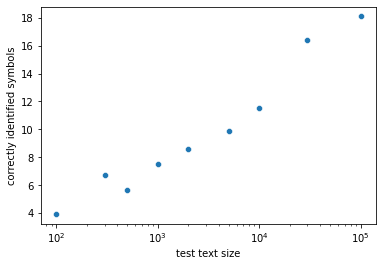

In [5]:
import seaborn as sns

def get_accuracy_unigrams(size, corpus, freqs_corpus, n_times):
    values = []
    for i in range(n_times):
        start = np.random.randint(30000, len(corpus) - size - 1)
        test = corpus[start:start + size]
        mapping, encrypted = gen_randomly_decoded_text(test)
        decode_mapping, decoded = decode_with_frequencies(encrypted, freqs_corpus)
        correctly = correctly_decoded_symbols(mapping, decode_mapping)
        values.append(len(correctly))
    return np.array(values).mean()

sizes = [100, 300, 500, 1000, 2000, 5000, 10000, 30000, 100000]
scplot = sns.scatterplot(sizes, [get_accuracy_unigrams(size, text, freqs_corpus, 10) for size in sizes])
scplot.set(xscale='log', xlabel='test text size', ylabel='correctly identified symbols');

### Bigramms

In [6]:
from collections import defaultdict

def calc_bigram_freq(text):
    bigrams = defaultdict(int)
    for i in range(len(text) - 1):
        bigram = text[i] + text[i + 1]
        bigrams[bigram] += 1
    bigrams = sorted(bigrams.items(), key= lambda x: -x[1])
    return [v[0] for v in bigrams]

freqs_bi_corpus = calc_bigram_freq(text)

def decode_with_bigram_frequencies(encrypted, freqs_corpus, verbose=False):
    freqs_test = calc_bigram_freq(encrypted)
    decode_mapping = dict()
    for bt in freqs_test:
        if decode_mapping.get(bt[0]) is not None and decode_mapping.get(bt[1]) is not None:
            continue
        elif decode_mapping.get(bt[0]) is not None:
            for bc in [v for v in freqs_corpus if v[0] == decode_mapping.get(bt[0])]:
                if bc[1] not in decode_mapping.values():
                    decode_mapping[bt[1]] = bc[1]
                    break
        elif decode_mapping.get(bt[1]) is not None:
            for bc in [v for v in freqs_corpus if v[1] == decode_mapping.get(bt[1])]:
                if bc[0] not in decode_mapping.values():
                    decode_mapping[bt[0]] = bc[0]
                    break
        else:
            for bc in freqs_corpus:
                if bc[0] not in decode_mapping.values() and \
                    bc[1] not in decode_mapping.values():
                    decode_mapping[bt[0]] = bc[0]
                    decode_mapping[bt[1]] = bc[1]
                break
    alphabet_corp = np.unique(np.array(freqs_corpus))
    alphabet_enc = np.unique(np.array(list(encrypted)))
    not_used_enc = [c for c in alphabet_enc if c not in decode_mapping.keys()]
    not_used_corp = [c for c in alphabet_corp if c not in decode_mapping.values()]
    for i in range(len(not_used_enc)):
        decode_mapping[not_used_enc[i]] = not_used_corp[i]
    output = ''.join([decode_mapping.get(c, 'X') for c in encrypted])
    if verbose:
        print('\ndecode mapping:\n\n', decode_mapping)
        print('\ndecoded text:\n\n', output)
    return decode_mapping, output

decode_mapping, decoded1 = decode_with_bigram_frequencies(encrypted1, freqs_bi_corpus, True)
correctly = correctly_decoded_symbols(mapping, decode_mapping, True)


decode mapping:

 {'┄': 'e', 'Ѡ': ' ', 'ፊ': 't', 'ᖮ': 'a', 'Ћ': 'h', 'ồ': 'r', '\u0e60': 'd', 'Ɲ': 's', '്': 'n', 'ߜ': 'w', 'ଲ': 'i', 'Ų': 'o', '\u13fe': 'g', 'ཙ': 'b', 'ᵑ': 'y', 'Ꮰ': 'f', 'Ǿ': 'l', 'ቯ': 'm', 'ʎ': 'v', 'ᚿ': 'c', 'ধ': 'u', '\u0bdd': 'p', 'ᤎ': 'x', '\u0fcd': 'k', 'ލ': 'j', '۩': 'z'}

decoded text:

 eda broves oi tre bngit wrn hmwhfa anmles pgeatonia trht aeeves tn rov uedumexoiy cf sebosoiy trht eledftroiy wha aumeisos kgat jhibf whita tn ce hi rgaahd wrht a nie tn sn vf sehd wrht h brhdvoiy bdehtgde fngd fngiyed yodm oa ahos tre loaotnd h mottme lnmbhin fea h deygmhd lnmbhin ahos tre bngit thzea hjted ve his wrht h lnobe are rha trngyr are a vf shgyrted o temm tre tdgtr wrei o ahf are mm ce h aoiyed h aebnis ahmnvnio we rhle eiyhyes hi othmohi tn yole red meaania oai t are tnn fngiy o rhl
5 [' ', 'e', 't', 'w', 'x']


/net/minus/home/shchegolev/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


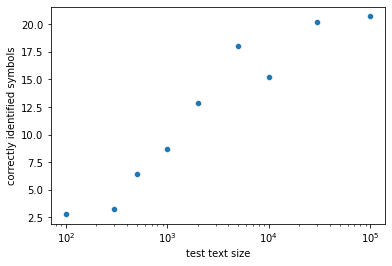

In [7]:
def get_accuracy_bigrams(size, corpus, freqs_corpus, n_times):
    values = []
    for i in range(n_times):
        start = np.random.randint(30000, len(corpus) - size - 1)
        test = corpus[start:start + size]
        mapping, encrypted = gen_randomly_decoded_text(test)
        decode_mapping, decoded = decode_with_bigram_frequencies(encrypted, freqs_corpus)
        correctly = correctly_decoded_symbols(mapping, decode_mapping)
        values.append(len(correctly))
    return np.array(values).mean()

sizes = [100, 300, 500, 1000, 2000, 5000, 10000, 30000, 100000]

scplot = sns.scatterplot(sizes, [get_accuracy_bigrams(size, text, freqs_bi_corpus, 10) for size in sizes])
scplot.set(xscale='log', xlabel='test text size', ylabel='correctly identified symbols');

So we see that bigrams work a little bit better than single letters but we can't hope decode small text using such way

### MCMC, Metropolis-Hastings

let us try to use MCMC sampling using Metropolis alpgorithm based on bigrams

In [8]:
# precalculation of bigram probabilities
def calc_bigram_probs(corpus):
    alphabet = np.unique(np.array(list(corpus)))
    freqs = Counter(list(corpus))
    bigrams = defaultdict(int)
    for i in range(len(corpus) - 1):
        bigram = corpus[i] + corpus[i + 1]
        bigrams[bigram] += 1
    for cl in alphabet: # Laplas smoothing
        for cr in alphabet:
            bigrams[cl + cr] += 1
    for bi in bigrams.keys():
        cl = bi[0]
        bigrams[bi] /= freqs[cl] + len(alphabet)
    return bigrams

bigram_freqs = calc_bigram_probs(text)

In [9]:
def get_decoded_text(encrypted, decode_mapping):
    return ''.join([decode_mapping[c] for c in encrypted])


def calc_mapping_likelyhood(text, mapping, freqs):
    decoded = get_decoded_text(text, mapping)
    likelyhood = 0
    for i in range(len(decoded) - 1):
        bigram = decoded[i] + decoded[i + 1]
        likelyhood += np.log(freqs[bigram])
    return likelyhood

def get_new_random_mapping(mapping):
    new_mapping = mapping.copy()
    a, b = np.random.choice(list(new_mapping.keys()), 2, replace=False)
    tmp = new_mapping[a]
    new_mapping[a] = new_mapping[b]
    new_mapping[b] = tmp
    return new_mapping

def metropolis_step(text, mapping, freqs, current_score, scaling):
    new_mapping = get_new_random_mapping(mapping)
    new_score = calc_mapping_likelyhood(text, new_mapping, freqs)
    if new_score > current_score:
        return new_mapping, new_score
    else:
        change = np.random.rand()
        if change < scaling * np.exp(new_score - current_score):
            return new_mapping, new_score
        else:
            return mapping, current_score



/net/minus/home/shchegolev/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/net/minus/home/shchegolev/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ers chimed in the count who always solved kuestions that seemed to him perplexing by deciding that everything was splendid just fancy wants to be an hussar what s one to do my dear what a charming creature your younger girl is said the visitor a little volcano yes a regular volcano said the count tazes after me and what a voice she has though she s my daughter i tell the truth when i say she ll be a singer a second salomoni we have engaged an italian to give her lessons isn t she too young i hav
ers chimed in the count who always solved questions that seemed to him perplexing by deciding that everything was splendid just fancy wants to be an hussar what s one to do my dear what a charming creature your younger girl is said the visitor a little volcano yes a regular volcano said the count takes after me and what a voice she has though she s my daughter i tell the truth when i say she ll be a singer a second salomoni we have engaged an italian to give her lessons isn t she too young i ha

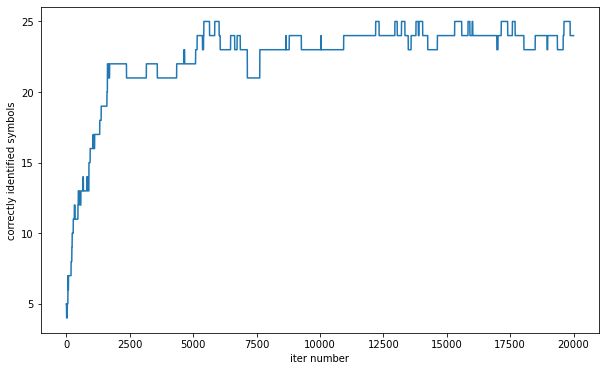

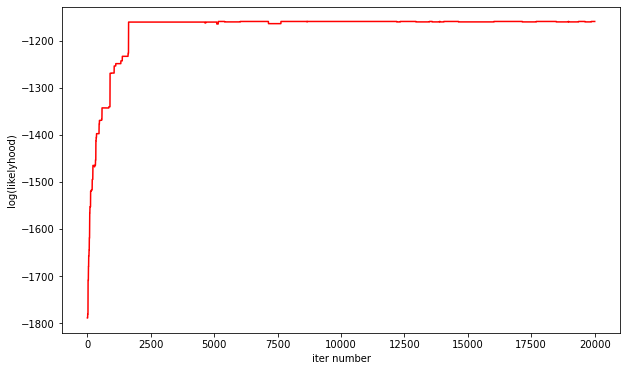

In [10]:
import matplotlib.pyplot as plt

scaling = 0.5
first_score =  calc_mapping_likelyhood(encrypted1, decode_mapping, bigram_freqs)
new_mapping, score = metropolis_step(encrypted1, decode_mapping, bigram_freqs, first_score, scaling)
found = [len(correctly_decoded_symbols(mapping, new_mapping))]
scores = [score]
max_iter = 20000
for i in range(max_iter):
    new_mapping, score = metropolis_step(encrypted1, new_mapping, bigram_freqs, score, scaling)
    found.append(len(correctly_decoded_symbols(mapping, new_mapping)))
    scores.append(score)

plt.figure(figsize=(10, 6))
plot = sns.lineplot(range(max_iter + 1), found)
plot.set(xlabel='iter number', ylabel='correctly identified symbols');

plt.figure(figsize=(10, 6))
plot = sns.lineplot(range(max_iter + 1), scores, color='r')
plot.set(xlabel='iter number', ylabel='log(likelyhood)');

print(get_decoded_text(encrypted1, new_mapping), test1, sep='\n')

Lets try to decode test sample from task

In [11]:
encrypted = 'დჳჵჂႨშႼႨშჂხჂჲდႨსႹႭჾႣჵისႼჰႨჂჵჂႨႲႹႧჲჂႨსႹႭჾႣჵისႼჰႨჲდႩჳჲႨჇႨႠჲႹქႹႨჳႹႹჱჶდსჂႽႨႩႹჲႹႭႼჰႨჵდქႩႹႨႲႭႹႧჂჲႣჲიႨჳႩႹႭდდႨშჳდქႹႨშႼႨშჳდႨჳხდჵႣჵჂႨႲႭႣშჂჵისႹႨჂႨႲႹჵჇႧჂჲდႨჾႣႩჳჂჾႣჵისႼჰႨჱႣჵჵႨეႣႨႲႹჳჵდხსდდႨႧდჲშდႭჲႹდႨეႣხႣსჂდႨႩჇႭჳႣႨႾႹჲႽႨႩႹსდႧსႹႨႽႨსჂႧდქႹႨსდႨႹჱდჶႣნ'

print(len(encrypted), len(alphabet), len(np.unique(np.array(list(encrypted)))))

230 27 28


I see that we have not enough symbols in English alphabet for decoding the message, but let us try anyway (I remove last symbol from the message)

/net/minus/home/shchegolev/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


elfa bu bakase hindofthug afa wicsa hindofthug sepls r qsixi liimzehay pisinug fexpi wnicasost lpinee blexi bu ble lkefofa wnobafthi a wifrcase dopladofthug moff jo wilfekhee cesbensie jokohae prnlo visy pihechi y hacexi he imezo


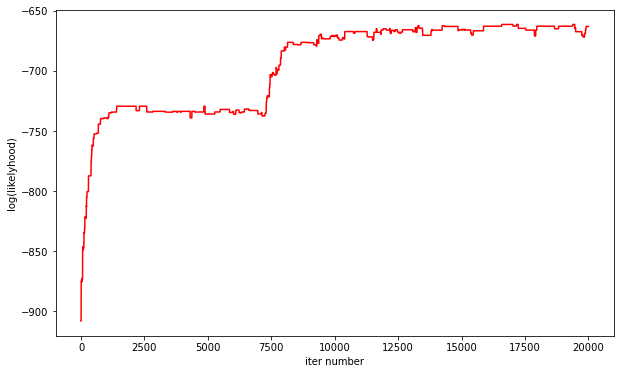

In [12]:
decode_mapping, decoded = decode_with_bigram_frequencies(encrypted[:-1], freqs_bi_corpus)
scaling = 1.5
first_score =  calc_mapping_likelyhood(encrypted[:-1], decode_mapping, bigram_freqs)
new_mapping, score = metropolis_step(encrypted[:-1], decode_mapping, bigram_freqs, first_score, scaling)
scores = [score]
max_iter = 20000
for i in range(max_iter):
    new_mapping, score = metropolis_step(encrypted[:-1], new_mapping, bigram_freqs, score, scaling)
    scores.append(score)
    
plt.figure(figsize=(10, 6))
plot = sns.lineplot(range(max_iter + 1), scores, color='r')
plot.set(xlabel='iter number', ylabel='log(likelyhood)');

print(get_decoded_text(encrypted[:-1], new_mapping))

seems that we don't succeed with English, попробуем русский

In [25]:
text = get_text_corpus('texts/AnnaKarenina.txt', '[а-ё]+') + ' ' + get_text_corpus('texts/WarAndPeace.txt', '[а-ё]+')
alphabet = np.unique(np.array(list(text)))
print(alphabet, len(alphabet))

[' ' 'а' 'б' 'в' 'г' 'д' 'е' 'ж' 'з' 'и' 'й' 'к' 'л' 'м' 'н' 'о' 'п' 'р'
 'с' 'т' 'у' 'ф' 'х' 'ц' 'ч' 'ш' 'щ' 'ъ' 'ы' 'ь' 'э' 'ю' 'я' 'ё'] 34


/net/minus/home/shchegolev/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


если вы вимите норжальных или почти норжальных текст у этого соодшения которых легко прочитать скорее всего вы все смелали правильно и получите жаксижальных далл за послемнее четвертое замание курса ботя конечно я ничего не одешаю


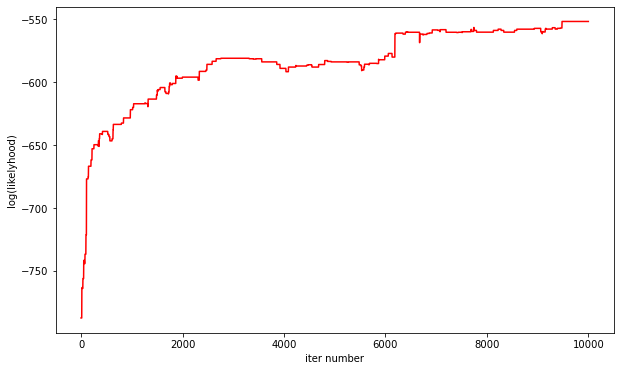

In [34]:
freqs_bi_corpus = calc_bigram_freq(text)
bigram_freqs = calc_bigram_probs(text)

decode_mapping, decoded = decode_with_bigram_frequencies(encrypted, freqs_bi_corpus)
scaling = 1.
first_score =  calc_mapping_likelyhood(encrypted, decode_mapping, bigram_freqs)
new_mapping, score = metropolis_step(encrypted, decode_mapping, bigram_freqs, first_score, scaling)
scores = [score]
max_iter = 10000
for i in range(max_iter):
    new_mapping, score = metropolis_step(encrypted[:-1], new_mapping, bigram_freqs, score, scaling)
    scores.append(score)
    
plt.figure(figsize=(10, 6))
plot = sns.lineplot(range(max_iter + 1), scores, color='r')
plot.set(xlabel='iter number', ylabel='log(likelyhood)');

print(get_decoded_text(encrypted, new_mapping))

/net/minus/home/shchegolev/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


если вы вимите норшальных или почти норшальных текст у этого соождения которых легко прочитать скорее всего вы все смелали правильно и получите шаксишальных жалл за послемнее четвертое замание курса ботя конечно я ничего не ожедаю


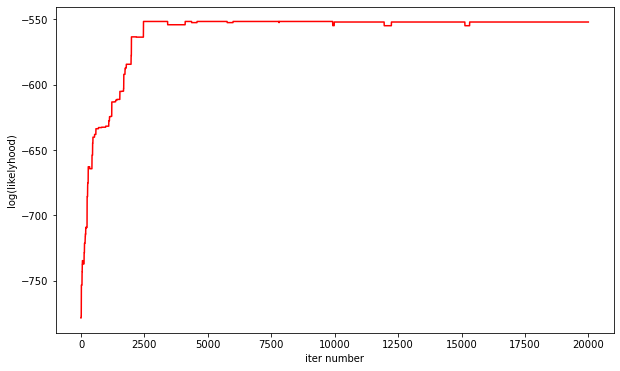

In [36]:
freqs_bi_corpus = calc_bigram_freq(text)
bigram_freqs = calc_bigram_probs(text)

decode_mapping, decoded = decode_with_bigram_frequencies(encrypted, freqs_bi_corpus)
scaling = 0.3
first_score =  calc_mapping_likelyhood(encrypted, decode_mapping, bigram_freqs)
new_mapping, score = metropolis_step(encrypted, decode_mapping, bigram_freqs, first_score, scaling)
scores = [score]
max_iter = 20000
for i in range(max_iter):
    new_mapping, score = metropolis_step(encrypted[:-1], new_mapping, bigram_freqs, score, scaling)
    scores.append(score)
    
plt.figure(figsize=(10, 6))
plot = sns.lineplot(range(max_iter + 1), scores, color='r')
plot.set(xlabel='iter number', ylabel='log(likelyhood)');

print(get_decoded_text(encrypted, new_mapping))

Примерно то же самое получилось...
Ну вот, алгоритмом Метрополиса-Гастингса действительно удалось почти точно расшифровать сообщение, которое звучит здорово

Попробуем посмотреть насколько в среднем будет эффективен метод по сравнению с предыдущими рассмотренными вариантами. Для этого вернемся снова к английскому тексту

100 5
300 18
500 23
1000 23
2000 27
5000 27


/net/minus/home/shchegolev/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


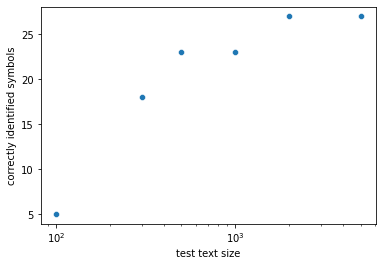

In [23]:
text = get_text_corpus('texts/WarAndPeaceEng.txt', '[a-z]+')
freqs_bi_corpus = calc_bigram_freq(text)
bigram_freqs = calc_bigram_probs(text)

def decode_with_metropolis_bigrams(encrypted, freqs_bi_corpus, bigram_freqs, scaling, max_iter):
    decode_mapping, decoded = decode_with_bigram_frequencies(encrypted, freqs_bi_corpus)
    first_score =  calc_mapping_likelyhood(encrypted, decode_mapping, bigram_freqs)
    new_mapping, score = metropolis_step(encrypted, decode_mapping, bigram_freqs, first_score, scaling)
    for i in range(max_iter):
        new_mapping, score = metropolis_step(encrypted[:-1], new_mapping, bigram_freqs, score, scaling)
    return new_mapping, get_decoded_text(encrypted, new_mapping)

def get_accuracy_metropolis_bigrams(size, corpus, freqs_corpus, bigram_freqs, n_times):
    values = []
    for i in range(n_times):
        start = np.random.randint(30000, len(corpus) - size - 1)
        test = corpus[start:start + size]
        mapping, encrypted = gen_randomly_decoded_text(test)
        decode_mapping, decoded = decode_with_metropolis_bigrams(encrypted,
                                                                 freqs_bi_corpus,
                                                                 bigram_freqs,
                                                                 1.,
                                                                 3000)
        correctly = correctly_decoded_symbols(mapping, decode_mapping)
        values.append(len(correctly))
    return np.array(values).max()

sizes = [100, 300, 500, 1000, 2000, 5000]
accuraces = []
for size in sizes:
    accuracy = get_accuracy_metropolis_bigrams(size, text, freqs_bi_corpus, bigram_freqs,3)
    print(size, round(accuracy, 1))
    accuraces.append(accuracy)

scplot = sns.scatterplot(sizes, accuraces)
scplot.set(xscale='log', xlabel='test text size', ylabel='correctly identified symbols');

Довольно долго работает, поэтому число итераций установлено небольшое. Но даже учитывая это, и то что scaling одинаковый для всех случаев, видно что алгоритм даёт результаты существенно лучшие чем просто частотный метод на буквах и биграммах

### Бонус 1, попробуем триграммы

In [37]:
# precalculation of bigram probabilities
def calc_trigram_probs(corpus):
    bigrams = defaultdict(int)
    trigrams = defaultdict(int)
    for i in range(len(corpus) - 2):
        bigram = corpus[i:i+2]
        trigram = corpus[i:i+3]
        bigrams[bigram] += 1
        trigrams[trigram] += 1
    bigram = corpus[len(corpus) - 2:len(corpus)]
    bigrams[bigram] += 1
    alphabet = np.unique(np.array(list(corpus)))
    for c1 in alphabet:
        for c2 in alphabet:
            for c3 in alphabet:
                trigrams[c1 + c2 + c3] += 1
                trigrams[c1 + c2 + c3] /= bigrams[c1 + c2] + len(alphabet) * len(alphabet)
    return trigrams

trigram_freqs = calc_trigram_probs(text)

In [38]:
def calc_mapping_likelyhood(text, mapping, freqs):
    decoded = get_decoded_text(text, mapping)
    likelyhood = 0
    for i in range(len(decoded) - 2):
        trigram = decoded[i:i+3]
        likelyhood += np.log(freqs[trigram])
    return likelyhood

def metropolis_step(text, mapping, freqs, current_score, scaling):
    new_mapping = get_new_random_mapping(mapping)
    new_score = calc_mapping_likelyhood(text, new_mapping, freqs)
    if new_score > current_score:
        return new_mapping, new_score
    else:
        change = np.random.rand()
        if change < scaling * np.exp(new_score - current_score):
            return new_mapping, new_score
        else:
            return mapping, current_score

Попробуем расшифровать заданный текст с помощью триграмм

/net/minus/home/shchegolev/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


если вы видите норжальным или почти норжальным текст у этого сообшения которым легко прочитать скорее всего вы все сделали правильно и получите жаксижальным балл за последнее четвертое задание курса хотя конечно я ничего не обешаю


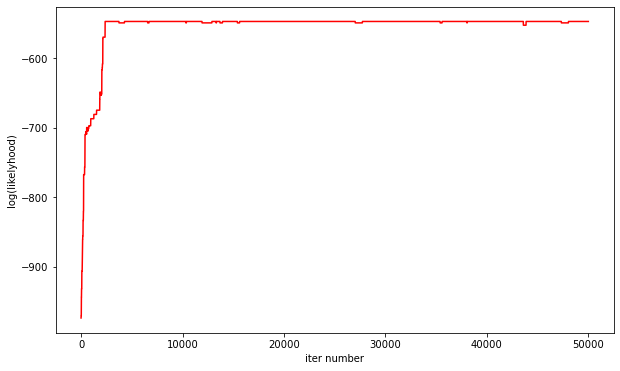

In [40]:
text = get_text_corpus('texts/AnnaKarenina.txt', '[а-ё]+') + ' ' + get_text_corpus('texts/WarAndPeace.txt', '[а-ё]+')

freqs_bi_corpus = calc_bigram_freq(text) # for start mapping we can use mapping obtained with bigram freqs (there are 1-5 letters correctly identified) 
trigram_freqs = calc_trigram_probs(text)

decode_mapping, decoded = decode_with_bigram_frequencies(encrypted, freqs_bi_corpus)
scaling = 1.
first_score =  calc_mapping_likelyhood(encrypted, decode_mapping, trigram_freqs)
new_mapping, score = metropolis_step(encrypted, decode_mapping, trigram_freqs, first_score, scaling)
scores = [score]
max_iter = 50000
for i in range(max_iter):
    new_mapping, score = metropolis_step(encrypted[:-1], new_mapping, trigram_freqs, score, scaling)
    scores.append(score)
    
plt.figure(figsize=(10, 6))
plot = sns.lineplot(range(max_iter + 1), scores, color='r')
plot.set(xlabel='iter number', ylabel='log(likelyhood)');

print(get_decoded_text(encrypted, new_mapping))

Почти идеально, три буквы интерпретированы неверно. На биграммах сколько я не пробовал, ни разу не получил слово обещаю (обычно расшифровка ближе к слову ожидаю), а тут вполне себе, только ш вместо щ 

Теперь посмотрим на метрики

100 15
300 24
500 25
1000 24
2000 26


/net/minus/home/shchegolev/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


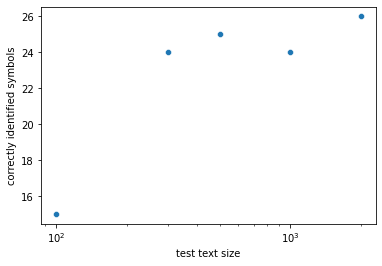

In [42]:
text = get_text_corpus('texts/WarAndPeaceEng.txt', '[a-z]+')
freqs_bi_corpus = calc_bigram_freq(text)
trigram_freqs = calc_trigram_probs(text)

def decode_with_metropolis_trigrams(encrypted, freqs_bi_corpus, trigram_freqs, scaling, max_iter):
    decode_mapping, decoded = decode_with_bigram_frequencies(encrypted, freqs_bi_corpus)
    first_score =  calc_mapping_likelyhood(encrypted, decode_mapping, trigram_freqs)
    new_mapping, score = metropolis_step(encrypted, decode_mapping, trigram_freqs, first_score, scaling)
    for i in range(max_iter):
        new_mapping, score = metropolis_step(encrypted[:-1], new_mapping, trigram_freqs, score, scaling)
    return new_mapping, get_decoded_text(encrypted, new_mapping)

def get_accuracy_metropolis_bigrams(size, corpus, freqs_corpus, trigram_freqs, n_times):
    values = []
    for i in range(n_times):
        start = np.random.randint(30000, len(corpus) - size - 1)
        test = corpus[start:start + size]
        mapping, encrypted = gen_randomly_decoded_text(test)
        decode_mapping, decoded = decode_with_metropolis_bigrams(encrypted,
                                                                 freqs_bi_corpus,
                                                                 trigram_freqs,
                                                                 1.,
                                                                 10000)
        correctly = correctly_decoded_symbols(mapping, decode_mapping)
        values.append(len(correctly))
    return np.array(values).max()

sizes = [100, 300, 500, 1000, 2000]
accuraces = []
for size in sizes:
    accuracy = get_accuracy_metropolis_bigrams(size, text, freqs_bi_corpus, trigram_freqs, 3)
    print(size, round(accuracy, 1))
    accuraces.append(accuracy)

scplot = sns.scatterplot(sizes, accuraces)
scplot.set(xscale='log', xlabel='test text size', ylabel='correctly identified symbols');

Кажется, что с триграммами стало ещё лучше (на маленьких длинах текста уже существенный процент угаданных букв)